# 🚜 Predicción del Precio de Venta de Bulldozers utilizando Machine Learning

En este cuaderno, realizaremos un ejemplo de proyecto de aprendizaje automático con el objetivo de predecir el precio de venta de bulldozers.

### 1. Definición del Problema
¿Cuán bien podemos predecir el precio de venta futuro de un bulldozer, dados sus características y ejemplos previos de cuánto se han vendido bulldozers similares?

### 2. Datos
Los datos se descargan de la competición de Kaggle **Bluebook for Bulldozers**: [Bluebook for Bulldozers](https://www.kaggle.com/c/bluebook-for-bulldozers/data)

Hay 3 conjuntos de datos principales:
- **Train.csv**: Es el conjunto de entrenamiento, que contiene datos hasta finales de 2011.
- **Valid.csv**: Es el conjunto de validación, que contiene datos del 1 de enero de 2012 al 30 de abril de 2012. Se utiliza para realizar predicciones durante la mayor parte de la competencia. Tu puntuación en este conjunto se utiliza para generar el ranking público.
- **Test.csv**: Es el conjunto de prueba, que no se liberará hasta la última semana de la competencia. Contiene datos del 1 de mayo de 2012 a noviembre de 2012. Tu puntuación en este conjunto determina tu clasificación final en la competencia.

### 3. Evaluación
La métrica de evaluación para esta competición es el **RMSLE** (error logarítmico cuadrático medio de la raíz) entre los precios reales y los predichos en las subastas.

Para más información sobre la evaluación del proyecto, revisa: [Evaluación Bluebook for Bulldozers](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation)

**Nota**: El objetivo de la mayoría de las métricas de evaluación de regresión es minimizar el error. Por ejemplo, nuestro objetivo en este proyecto será construir un modelo de aprendizaje automático que minimice el RMSLE.

### 4. Características
Kaggle proporciona un diccionario de datos que detalla todas las características del conjunto de datos. Puedes consultar este diccionario de datos en Google Sheets: [Diccionario de Datos](https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import sys
import os

# Agregar la carpeta 'src' al path de búsqueda de Python
sys.path.append(os.path.abspath('../../scripts'))

from pathlib import Path

dataset_dir = Path("../../data/raw/scikit-learn-data/bluebook-for-bulldozers")
dataset_dir_processed = Path("../../data/processed/bluebook-for-bulldozers")

# Importar funciones desde utils.py
from utils import (
    plot_categorical_grid
)

In [2]:
# Comprobar archivos y carpetas disponibles
print(f"[INFO] Archivos/carpetas disponibles en {dataset_dir}:")
os.listdir(dataset_dir)

[INFO] Archivos/carpetas disponibles en ../../data/raw/scikit-learn-data/bluebook-for-bulldozers:


['random_forest_benchmark_test.csv',
 'Valid.csv',
 'median_benchmark.csv',
 'Valid.zip',
 'TrainAndValid.7z',
 'Test.csv',
 'Train.7z',
 'test_predictions.csv',
 'ValidSolution.csv',
 'train_tmp.csv',
 'Machine_Appendix.csv',
 'Train.csv',
 'Valid.7z',
 'Data Dictionary.xlsx',
 'TrainAndValid.csv',
 'Train.zip',
 'TrainAndValid.zip']

In [3]:
# Importar conjuntos de entrenamiento y validación
df = pd.read_csv(dataset_dir / "TrainAndValid.csv",
                 low_memory=False)
df.shape

(412698, 53)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
# Valores faltantes
missing_values = df.isnull().sum()
missing_percentage = np.round((missing_values / len(df)) * 100, 2)
missing_summary = pd.DataFrame({"missing_values": missing_values, "percentage": missing_percentage})
print(missing_summary.sort_values(by="missing_values", ascending=False))

                          missing_values  percentage
Engine_Horsepower                 386715       93.70
Pushblock                         386715       93.70
Enclosure_Type                    386715       93.70
Blade_Width                       386715       93.70
Blade_Extension                   386715       93.70
Tip_Control                       386715       93.70
Scarifier                         386704       93.70
Grouser_Tracks                    367823       89.13
Hydraulics_Flow                   367823       89.13
Coupler_System                    367724       89.10
fiModelSeries                     354031       85.78
Steering_Controls                 341176       82.67
Differential_Type                 341134       82.66
UsageBand                         339028       82.15
fiModelDescriptor                 337882       81.87
Backhoe_Mounting                  331986       80.44
Stick                             331602       80.35
Turbocharged                      331602      

In [6]:
# Comprobar si hay registros duplicados
print(f'Duplicados: {df.duplicated().sum()}')

Duplicados: 0


In [7]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

Como estamos trabajando en un problema de **series temporales**, probablemente merezca la pena convertir estas cadenas en objetivos `datetime` de Python.

Antes de hacerlo, vamos a visualizar la columna `saledate`contra la columna `SalePrice` utilizando un gráfico de dispersión.

Para evitar que el gráfico sea demasiado grande, visualizaremos solo los 1000 primero valores.

In [8]:
# Aplicar el theme por defecto
sns.set_theme()

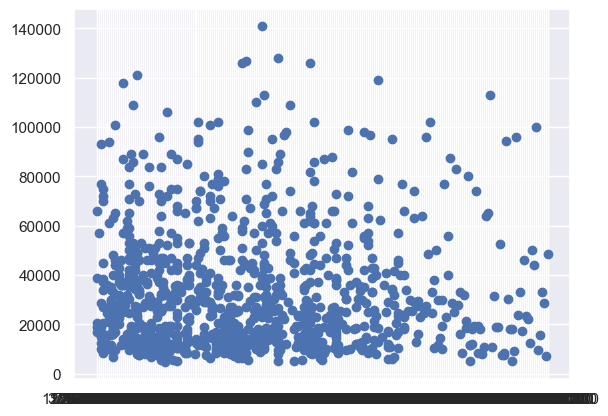

In [9]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [10]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

In [11]:
df.saledate.dtype

dtype('O')

#### Análisis Univariado

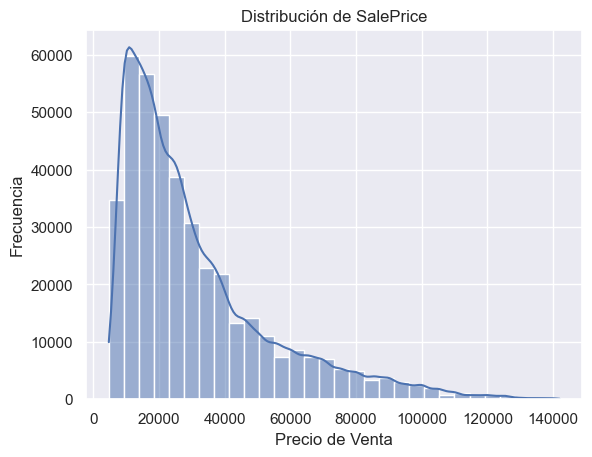

In [12]:
# Visualizar la distribución de la variable objetivo
sns.histplot(df["SalePrice"], kde=True, bins=30)
plt.title("Distribución de SalePrice")
plt.xlabel("Precio de Venta")
plt.ylabel("Frecuencia")
plt.show()

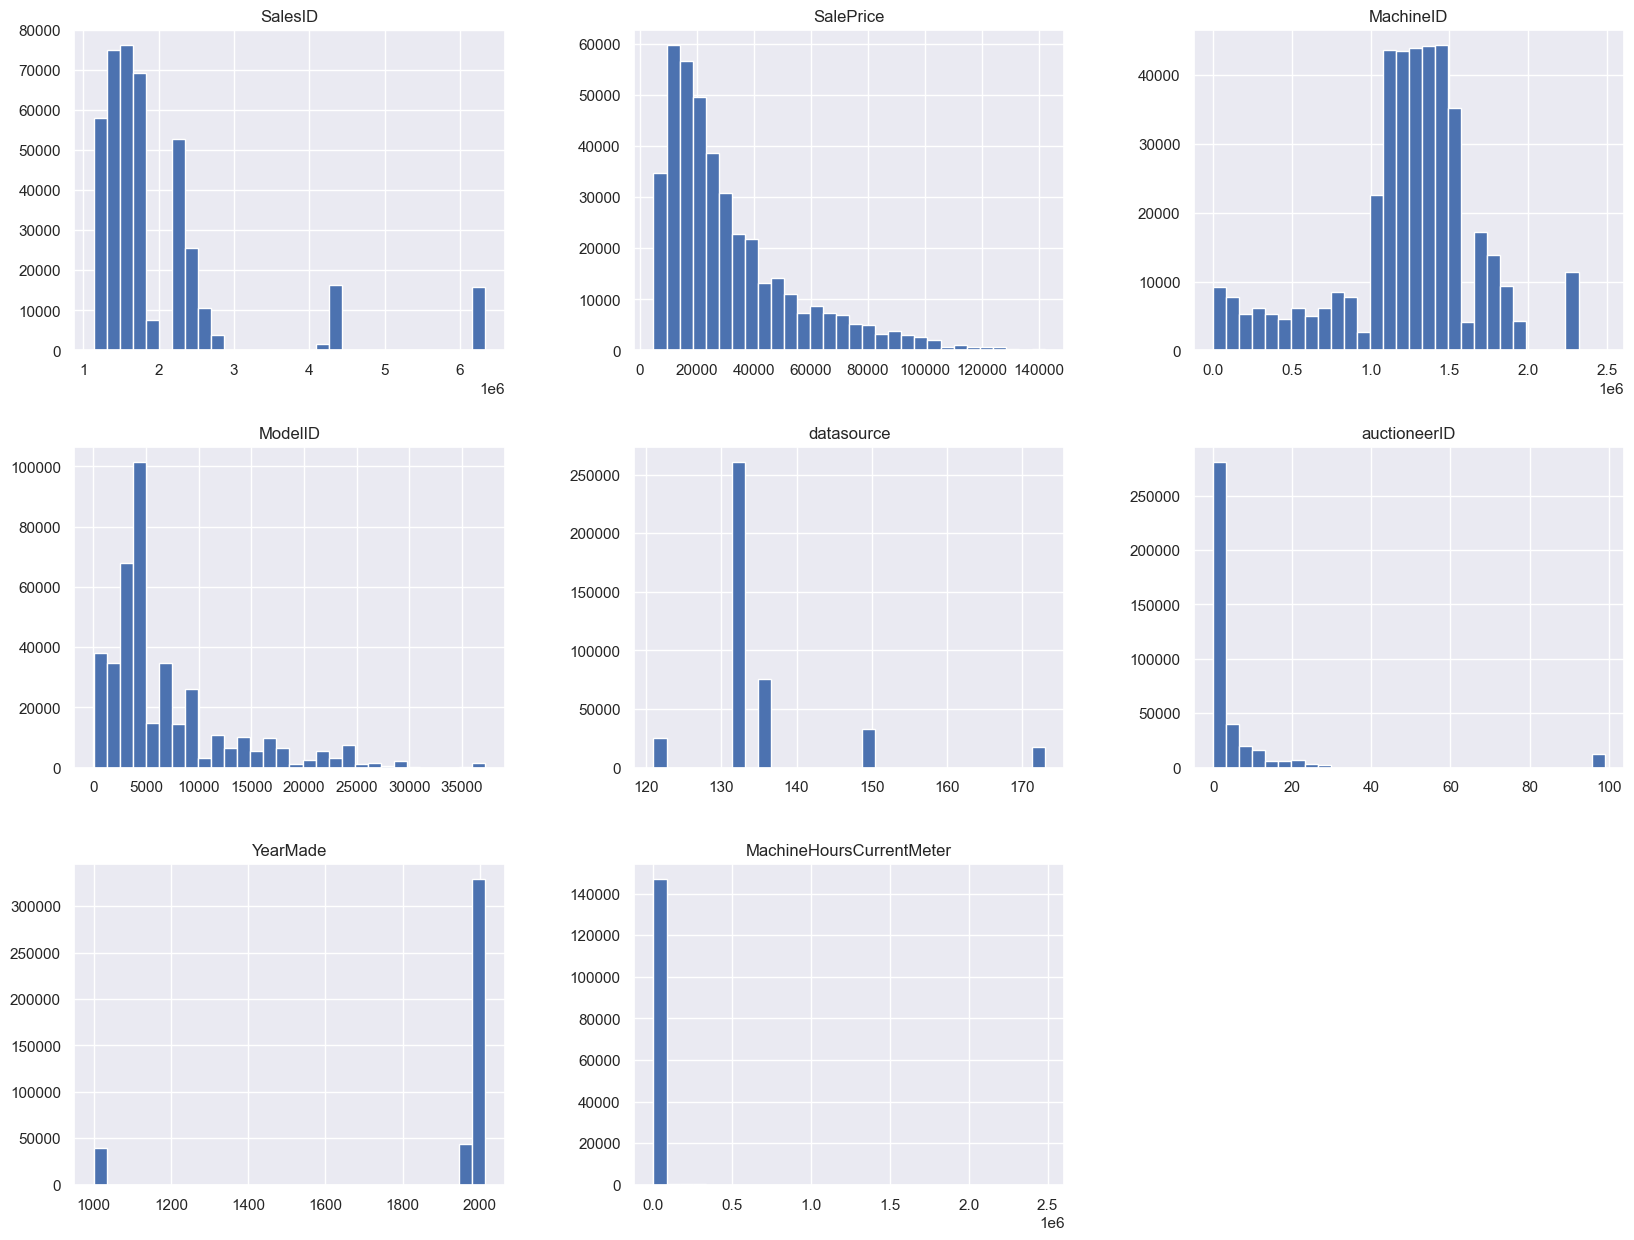

In [13]:
# Distribuciones de variables numéricas
df.hist(bins=30, figsize=(20, 15))
plt.show()

### Análisis de fechas  

Cuando trabajamos con datos de series temporales, queremos enriquecer el componente de tiempo y fecha tanto como sea posible.  

Podemos hacer eso indicando a pandas cuál de nuestras columnas contiene fechas utilizando el parámetro `parse_dates`.

In [14]:
# Importar datos nuevamente, pero esta vez analizando fechas
df = pd.read_csv(dataset_dir / "TrainAndValid.csv",
                 low_memory=False, # para evitar la advertencia de tipos de datos mixtos
                 parse_dates=["saledate"])

El parámetro `parse_dates` en `pd.read_csv` le dice a Pandas que debe convertir automáticamente las columnas indicadas en objetos de tipo **datetime** mientras carga el archivo. Esto es útil para trabajar con columnas de fechas sin necesidad de convertirlas manualmente después de cargar los datos.

Si las fechas no están en un formato estándar, Pandas podría lanzar un error, pero en general, funciona para formatos comunes como `YYYY-MM-DD` o `DD/MM/YYYY`.

In [15]:
df.saledate.dtype

dtype('<M8[ns]')

Cuando Pandas convierte una columna en un objeto de tipo `datetime`, internamente utiliza un formato llamado **datetime64**, que es eficiente para manejar fechas en operaciones numéricas o de comparación.

In [16]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

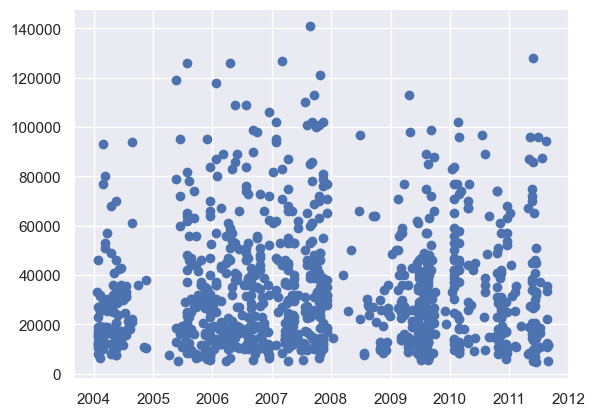

In [17]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [18]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [20]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Ordenar DataFrame por saledate  

Al trabajar con datos de series temporales, es una buena idea ordenarlos por fecha.

Como hemos formateado `saledate`, podemos usar métodos incorporados de pandas como `sorte_values` para conseguirlo.

In [21]:
# Ordenar el DataFrame por fecha
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Hacer una copia del DataFrame original

Hacemos una copia del DataFrame original para que cuando manipulemos la copia, aún tengamos nuestros datos originales.

In [22]:
# Haz una copia del DataFrame original para realizar ediciones.
df_tmp = df.copy()

### Agregar parámetros de fecha y hora para la columna `saledate`

In [23]:
df_tmp[:1].saledate

205615   1989-01-17
Name: saledate, dtype: datetime64[ns]

In [24]:
df_tmp[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int32

In [25]:
df_tmp[:1].saledate.dt.month

205615    1
Name: saledate, dtype: int32

In [26]:
df_tmp[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int32

In [27]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [28]:
# Ver solamente las nuevas columnas creadas
df_tmp[["SalePrice", "saleYear", "saleMonth", "saleDay", "saleDayOfWeek", "saleDayOfYear"]].head()

,SalePrice,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,9500.0,1989,1,17,1,17
274835,14000.0,1989,1,31,1,31
141296,50000.0,1989,1,31,1,31
212552,16000.0,1989,1,31,1,31
62755,22000.0,1989,1,31,1,31


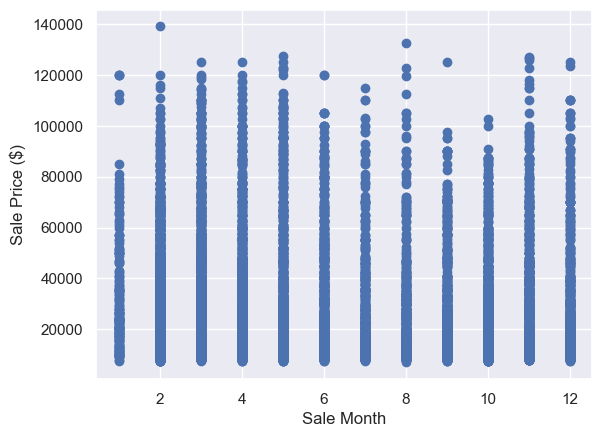

In [29]:
# Ver 10,000 ejemplos de SalePrice frente saleMonth
fig, ax = plt.subplots()
ax.scatter(x=df_tmp["saleMonth"][:10000],
           y=df_tmp["SalePrice"][:10000])
ax.set_xlabel("Sale Month")
ax.set_ylabel("Sale Price ($)");

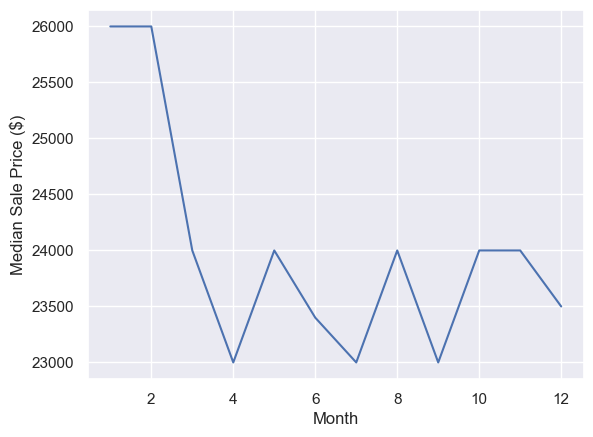

In [30]:
# Agrupar DataFrame por saleMonth y luego encontrar la mediana de SalePrice
df_tmp.groupby(["saleMonth"])["SalePrice"].median().plot()
plt.xlabel("Month")
plt.ylabel("Median Sale Price ($)");

Parece que los precios medios de venta de enero y febrero (meses 1 y 2) son bastante más altos que los de los otros meses del año. *¿Podría deberse al gasto presupuestario de año Nuevo?* 🤔 Esto podría requerir un poco más de investigación. Seguiremos profundizando en otros valores.

In [31]:
# Ahora que hemos enriquecido nuestro DataFrame con características de fecha y hora, podemos eliminar 'saledate'.
df_tmp.drop("saledate", axis=1, inplace=True)

Vamos a comprobar ahora qué estados venden más excavadoras:

In [32]:
# Los 10 estados que más excavadoras venden
df_tmp.state.value_counts()[:10]

state
Florida        67320
Texas          53110
California     29761
Washington     16222
Georgia        14633
Maryland       13322
Mississippi    13240
Ohio           12369
Illinois       11540
Colorado       11529
Name: count, dtype: int64

Queremos hallar ahora la mediana del precio de venta por estado y compararla con la mediana de todas las muestras

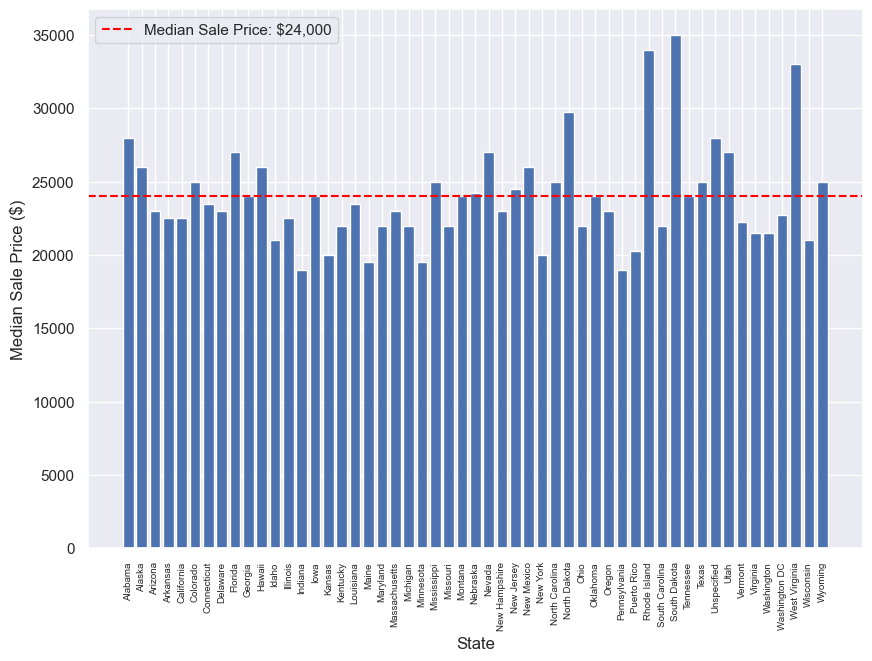

In [33]:
# Agrupar DataFrame por saleMonth y luego encontrar la mediana SalePrice por estado, así como en todo el dataset
median_prices_by_state = df_tmp.groupby(["state"])["SalePrice"].median() # esto devolverá una Serie pandas en lugar de un DataFrame
median_sale_price = df_tmp["SalePrice"].median()

# Crear un gráfico que compare el precio medio de venta por estado con el precio medio de venta global
plt.figure(figsize=(10, 7))
plt.bar(x=median_prices_by_state.index, # Como estamos trabajando con una Serie, podemos utilizar el índice (nombres de los estados) como los valores x
        height=median_prices_by_state.values)
plt.xlabel("State")
plt.ylabel("Median Sale Price ($)")
plt.xticks(rotation=90, fontsize=7);
plt.axhline(y=median_sale_price, 
            color="red", 
            linestyle="--", 
            label=f"Median Sale Price: ${median_sale_price:,.0f}")
plt.legend();

El objetivo de las visualizaciones y gráficos que vamos realizando es construir poco a poco un modelo mental de nuestros datos.

In [34]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [35]:
len(df_tmp)

412698

## 5. Modelado  

Hemos realizado un pequeño Análisis Exploratorio de Datos (EDA) y lo hemos enriquecido con algunos atributos de fecha y hora, ahora vamos a intentar modelarlo.

¿Por qué modelarlo tan pronto?

Bueno, conocemos la métrica de evaluación (error logarítmico cuadrático medio o RMSLE) a la que nos dirigimos.

Podríamos pasar más tiempo haciendo EDA, descubriendo más sobre los datos nosotros mismos, pero lo que haremos en su lugar es utilizar un modelo de aprendizaje automático para ayudarnos a hacer EDA mientras trabajamos simultáneamente hacia la mejor métrica de evaluación que podamos obtener.

Recuerda, uno de los mayores objetivos de iniciar cualquier nuevo proyecto de aprendizaje automático es reducir el tiempo entre experimentos.

Siguiendo el [mapa de aprendizaje automático de Scikit-Learn](https://scikit-learn.org/stable/machine_learning_map.html) y teniendo en cuenta que tenemos más de 100.000 ejemplos, encontramos que un modelo `sklearn.linear_model.SGDRegressor` o un modelo `sklearn.ensemble.RandomForestRegressor` podrían ser buenos candidatos.

Ya que hemos trabajado con el algoritmo Random Forest antes (en el [problema de clasificación de enfermedades del corazón](notebooks/5-structured-data-projects/heart-disease-classification.ipynb), vamos a probarlo en nuestro problema de regresión.

> **Nota:** Por ahora sólo estamos probando un modelo. Pero puedes probar muchos otros tipos de modelos de la librería Scikit-Learn, la mayoría funcionan con una API similar. Incluso hay bibliotecas como `LazyPredict` que probarán muchos modelos simultáneamente y devolverán una tabla con los resultados.

In [36]:
# Construir el modelo (esto no funcionará)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"]) # Value Error: could not convert string to float: 'Low'

El problema aquí es que algunas de las características de nuestros datos están en formato de cadena y normalmente, los modelos de aprendizaje automático requieren que todos los datos estén en formato numérico

Por no mencionar que algunas de nuestras muestras tienen valores faltantes.

Empecemos inspeccionando los diferentes tipos de datos en nuestro DataFrame.

Usando el método `pandas.DataFrame.info()`, podemos ver los diferentes tipos de datos así como cuántos no nulos (un valor nulo es generalmente un valor perdido o faltante) hay en nuestro DataFrame `df_tmp`.

> **Nota:** Hay algunos modelos ML como `sklearn.ensemble.HistGradientBoostingRegressor`, `CatBoost` y `XGBoost` que pueden manejar valores faltantes.

In [37]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

Vemos que hay diferentes tipos de datos (`int64`, `float64`, `object`).

> **Recurso:** Puedes ver una lista de todos los [pandas dtypes en la pandas user guide](https://pandas.pydata.org/docs/user_guide/basics.html#dtypes).

In [38]:
df_tmp["UsageBand"].dtype

dtype('O')

Vamos a ver cuántos valores faltantes hay en cada columan usando [`pandas.DataFrame.isna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) (`isna` significa 'is null or NaN') que devolverá un booleano `True`/`False` si falta un valor (`True` si falta, `False` si no). 

In [39]:
df_tmp.head().isna()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,False,False,False,False,False,False,False,True,True,False,...,False,False,False,True,True,False,False,False,False,False
274835,False,False,False,False,False,False,False,True,True,False,...,True,True,True,False,False,False,False,False,False,False
141296,False,False,False,False,False,False,False,True,True,False,...,False,False,False,True,True,False,False,False,False,False
212552,False,False,False,False,False,False,False,True,True,False,...,True,True,True,False,False,False,False,False,False,False
62755,False,False,False,False,False,False,False,True,True,False,...,False,False,False,True,True,False,False,False,False,False


Esta forma no es útil porque llevaría mucho tiempo revisar cada fila una a una.

Mejor vamos a obtener el total de valores True/False de cada columna, concatenando `.sum()` a `isna()`:

In [40]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

Vemos que a nuestro DataFrame le faltan bastantes valores. Lo arreglaremos más adelante.

Primero convertiremos todos los datos en números.

### Inspeccionar los tipos de datos en el DataFrame

Una forma en que podemos convertir todos nuestros datos en números es transformándolos en categorías de pandas.

Podemos consultar los diferentes tipos de datos compatibles con pandas aquí: 
https://pandas.pydata.org/docs/reference/api/pandas.api.types.pandas_dtype.html

> **Nota:** Hay muchas formas diferentes de convertir valores en números. Y a menudo la mejor manera será específica para el valor que se está intentando convertir. El método que vamos a utilizar, convertir todos los objetos (que en su mayoría son cadenas) a categorías es uno de los métodos más rápidos ya que hace una rápida suposición de que cada valor único es su propio número.

Podemos comprobar el tipo de datos de una columna individual utilizando el atributo `.dtype` y podemos obtener su nombre completo utilizando `.dtype.name.`

In [41]:
# Obtener el dtype de "UsageBand"
df_tmp["UsageBand"].dtype, df_tmp["UsageBand"].dtype.name

(dtype('O'), 'object')

Otra forma de comprobar directamente el tipo de datos de una columna y obtener una respuesta booleana sobre si la entrada es un objeto o no es usando [`pd.api.types.is_object_dtype(arr_or_dtype)`](https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_object_dtype.html). 

> **Nota:** Hay muchas más de estas comprobaciones que se pueden realizar para otros tipos de datos como cadenas bajo un espacio de nombre similar `pd.api.types.is_XYZ_dtype`. Consulte la [documentación de pandas](https://pandas.pydata.org/docs/reference/arrays.html) para más información.

In [42]:
# Comprobar si una columna es un objeto
pd.api.types.is_object_dtype(df_tmp["UsageBand"])

True

In [43]:
# Comprobar si una columna es una cadena (string)
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

False

In [44]:
# Comprobar si una columna es una cadena (string)
pd.api.types.is_string_dtype(df_tmp["state"])

True

Incluso podemos hacer un bucle a través de los elementos (columnas y sus etiquetas) en nuestro DataFrame usando [`pandas.DataFrame.items()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.items.html) (en términos de diccionario Python, llamar a `.items()` en un DataFrame tratará los nombres de las columnas como claves y los valores de las columnas como valores) e imprimir muestras de columnas que tengan el tipo de dato `string`.

Como comprobación adicional, si se pasa la muestra a [`pd.api.types.infer_dtype()`](https://pandas.pydata.org/docs/reference/api/pandas.api.types.infer_dtype.html) devolverá el tipo de dato de la muestra.

Esta será una buena forma de seguir explorando nuestros datos.

In [45]:
# Encontrar las columnas que contengan strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [46]:
# Identificar columnas que contienen strings válidos
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):  # Identifica columnas tipo object
        if content.dropna().apply(lambda x: isinstance(x, str)).all():  # Verifica que todo sea string
            print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [47]:
# Imprimir los nombres de las columnas y el contenido de ejemplo de las columnas que contienen cadenas
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        # Comprobar el tipo de datos de la columna target
        column_datatype = df_tmp[label].dtype.name
        
        # Obtener una muestra aleatoria de los valores de la columna
        example_value = content.sample(1).values
        
         # Inferir el tipo de datos de la muestra aleatoria
        example_value_dtype = pd.api.types.infer_dtype(example_value)
        print(f"Nombre columna: {label} | dtype: {column_datatype} | Valor de ejemplo: {example_value} | Valor de ejemplo dtype: {example_value_dtype}")

Nombre columna: fiModelDesc | dtype: object | Valor de ejemplo: ['12F'] | Valor de ejemplo dtype: string
Nombre columna: fiBaseModel | dtype: object | Valor de ejemplo: ['310'] | Valor de ejemplo dtype: string
Nombre columna: fiProductClassDesc | dtype: object | Valor de ejemplo: ['Track Type Tractor, Dozer - 160.0 to 190.0 Horsepower'] | Valor de ejemplo dtype: string
Nombre columna: state | dtype: object | Valor de ejemplo: ['Texas'] | Valor de ejemplo dtype: string
Nombre columna: ProductGroup | dtype: object | Valor de ejemplo: ['WL'] | Valor de ejemplo dtype: string
Nombre columna: ProductGroupDesc | dtype: object | Valor de ejemplo: ['Motor Graders'] | Valor de ejemplo dtype: string


Hagamos lo mismo con las columnas que son de tipo `object`:

In [48]:
# Inicia un recuento de cuántas columnas de tipo objeto hay
number_of_object_type_columns = 0

for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content): 
        column_datatype = df_tmp[label].dtype.name

        example_value = content.sample(1).values

        example_value_dtype = pd.api.types.infer_dtype(example_value)
        print(f"Column name: {label} | Column dtype: {column_datatype} | Example value: {example_value} | Example value dtype: {example_value_dtype}")

        number_of_object_type_columns += 1

print(f"\n[INFO] Número total de columnas de tipo de objeto: {number_of_object_type_columns}")

Column name: UsageBand | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: fiModelDesc | Column dtype: object | Example value: ['EX400LC'] | Example value dtype: string
Column name: fiBaseModel | Column dtype: object | Example value: ['WA250'] | Example value dtype: string
Column name: fiSecondaryDesc | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: fiModelSeries | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: fiModelDescriptor | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: ProductSize | Column dtype: object | Example value: ['Large / Medium'] | Example value dtype: string
Column name: fiProductClassDesc | Column dtype: object | Example value: ['Motorgrader - 145.0 to 170.0 Horsepower'] | Example value dtype: string
Column name: state | Column dtype: object | Example value: ['Alabama'] | Example value dtype: string
Column name: Prod

### Convertir cadena en categorías

En pandas, una forma de convertir valores de objeto/cadena a valores numéricos es convertirlos a categorías o, más específicamente, al tipo de datos `pd.CategoricalDtype`.

Este tipo de datos mantiene los datos subyacentes (por ejemplo, no cambia la cadena) pero permite una fácil conversión a un código numérico usando [`.cat.codes`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.codes.html).

Por ejemplo, la columna «estado» podría tener los valores `'Alabama', 'Alaska', 'Arizona'...` y éstos podrían convertirse en valores numéricos `1, 2, 3...` respectivamente.

Para ver esto en acción, primero convirtamos las columnas de tipo de datos objeto a tipo de datos «categoría».

Podemos hacerlo recorriendo el `.items()` de nuestro DataFrame y reasignando cada columna de tipo objeto utilizando [`pandas.Series.astype(dtype=«category»)`](https://pandas.pydata.org/docs/reference/api/pandas.Series.astype.html).

In [49]:
# Esto convertirá todos los valores de cadena en valores de categoría.
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [50]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   object  
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  object  
 12  fiModelSeries             58667 non-null   object  
 13  fiModelDescriptor         748

**`pd.api.types.is_string_dtype`** solo detecta columnas que tienen valores exclusivamente de tipo string, lo cual excluye columnas con `NaN` o datos mixtos.

Algunas columnas no se convierten a `category` si tienen:
   - Datos nulos (`NaN`).
   - Datos mixtos (e.g., strings y números).

Para garantizar conversiones consistentes:
   - Reemplaza `NaN` con un valor explícito antes de convertir.
   - Verifica manualmente que las columnas de tipo `object` contengan únicamente cadenas antes de aplicar `astype("category")`.

Lo veremos a continuación.

In [51]:
# Comprobar el tipo de datos de una sola columna
df_tmp.state.dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=True, categories_dtype=object)

In [52]:
# Obtener los nombres de categoría de una columna determinada
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [53]:
# Inspeccionar los códigos de la categoría
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Esto nos da una representación numérica de nuestras columnas de tipo de datos object/string.

In [54]:
# Obtener cadena de ejemplo utilizando el número de categoría
target_state_cat_number = 43
target_state_cat_value = df_tmp.state.cat.categories[target_state_cat_number] 
print(f"[INFO] Número de categoría state objetivo {target_state_cat_number} maps to: {target_state_cat_value}")

[INFO] Número de categoría state objetivo 43 maps to: Texas


Gracias a las categorías de pandas, ahora podemos convertir las categorías en números.

Sin embargo, aún tenemos un montón de datos faltantes...

In [55]:
# Revisar datos faltantes
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Guardar los datos preprocesados

Antes de empezar a hacer cualquier otro paso de preprocesamiento en nuestro DataFrame, vamos a guardamos nuestro DataFrame actual en un archivo para poder importarlo de nuevo más tarde si es necesario.

Guardar y actualizar el conjunto de datos sobre la marcha es una práctica común en los problemas de aprendizaje automático. A medida que tu problema cambia y evoluciona, el conjunto de datos con el que estás trabajando probablemente cambiará también.

Hacer puntos de control de su conjunto de datos es similar a hacer puntos de control de su código.

In [56]:
# Exportar dataframe df_tmp actual
df_tmp.to_csv(dataset_dir_processed / "train_tmp.csv",
              index=False)

Ahora que hemos guardado nuestros datos preprocesados en un archivo, podemos volver a importarlos y asegurarnos de que tienen el mismo formato.

In [57]:
# Importar datos preprocesados
df_tmp = pd.read_csv(dataset_dir_processed / "train_tmp.csv",
                     low_memory=False)
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [58]:
# Comprobar nuevamente los valores faltantes
df_tmp.isna().sum().sort_values(ascending=False)[:20]

Blade_Width          386715
Engine_Horsepower    386715
Tip_Control          386715
Pushblock            386715
Blade_Extension      386715
Enclosure_Type       386715
Scarifier            386704
Hydraulics_Flow      367823
Grouser_Tracks       367823
Coupler_System       367724
fiModelSeries        354031
Steering_Controls    341176
Differential_Type    341134
UsageBand            339028
fiModelDescriptor    337882
Backhoe_Mounting     331986
Stick                331602
Turbocharged         331602
Pad_Type             331602
Blade_Type           330823
dtype: int64

## Rellenar valores faltantes

### Rellenar valores faltantes numéricos

#### Revisar valores faltantes

Primero vamos a identificar las columnas de tipo de datos numéricos.

Podemos hacerlo recorriendo las columnas de nuestro DataFrame y llamando a [`pd.api.types.is_numeric_dtype(arr_o_dtype)`](https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_numeric_dtype.html).

In [59]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [60]:
df_tmp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [61]:
# Ver cuántas columnas numéricas tienen valores faltantes
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


#### Debatir posibles formas de tratar los valores que faltan

Hay muchas formas de rellenar los valores que faltan. Algunas opciones potenciales para valores numéricos son:

| **Método** | **Ventajas** | **Desventajas** |
|-----|-----|-----|
| **Rellenar con la media de la columna** | - Fácil de calcular/implementar <br> - Conserva la distribución general de los datos | - Promedia la variación <br> - Afectado por valores atípicos (por ejemplo, si un valor es mucho mayor o menor que otros) |
| **Rellenar con mediana de la columna** | - Fácil de calcular/implementar <br> - Robusto ante valores atípicos <br> - Preserva el centro de datos | - Ignora la forma de distribución de datos |
| **Rellenar con modo de columna** | - Fácil de calcular/implementar <br> - Más útil para datos tipo categóricos | - Puede que no tenga sentido para datos continuos/numéricos |
| **Rellenar con 0 (u otra constante)** | - Sencillo de implementar <br> - Útil en determinados contextos como recuentos | - Introduce sesgo (por ejemplo, si 0 era un valor que significaba algo) <br> - Sesga los datos (por ejemplo, si faltan muchos valores, reemplazarlos todos con 0 hace que parezca que es el valor más común) |
| **Relleno hacia adelante/hacia atrás (Forward/Backward fill) (usar valores anteriores/futuros para completar valores futuros/anteriores)** | - Mantiene la continuidad temporal (para series temporales) | - Asume que los datos son continuos, lo que puede no ser válido |
| **Utilizar un cálculo de otras columnas** | - Toma información existente y la reinterpreta | - Puede dar lugar a resultados poco probables si los cálculos no son continuos | 
| **Interpolar (por ejemplo, como arrastrar una celda en Excel/Google Sheets)** | - Captura tendencias <br> - Adecuado para datos ordenados | - Puede introducir errores <br> - Puede asumir linealidad (los datos continúan en línea recta) |
| **Eliminar valores faltantes** | - Garantiza datos completos (use solo muestras con toda la información) <br> - Útil para conjuntos de datos pequeños | - Puede provocar la pérdida de datos (por ejemplo, si hay muchos valores faltantes dispersos en las columnas, el tamaño de los datos puede reducirse drásticamente) <br> - Reduce el tamaño del conjunto de datos |

El método que elijamos dependerá del conjunto de datos y del problema, y probablemente requerirá varias fases de experimentación para ver qué funciona y qué no.

Por ahora, rellenaremos los valores numéricos que faltan con el valor medio de la columna objetivo.

También añadiremos una columna binaria (0 ó 1) con filas que reflejen si falta o no un valor.

Por ejemplo, `MachineHoursCurrentMeter_is_missing` será una columna con filas que tendrán un valor de `0` si la columna `MachineHoursCurrentMeter` de esa fila *no* faltaba y `1` si faltaba.

In [62]:
# Rellenar las filas numéricas con la mediana
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Añadir una columna binaria que nos diga si faltaban datos o no
            df_tmp[label+"_is_missing"] = pd.isnull(content).astype(int) # esto añadirá un valor 0 o 1 a las filas con valores faltantes (p.ej. 0 = no faltante, 1 = faltante)
            # Rellenar los valores numéricos faltantes con la mediana
            df_tmp[label] = content.fillna(content.median())

¿Por qué añadir una columna binaria que indique si faltan datos o no?

Podemos completar fácilmente todos los valores numéricos que faltan en nuestro conjunto de datos con la mediana. 

Sin embargo, un valor numérico puede faltar por algún motivo. 

Añadir una columna binaria que indique si el valor faltaba o no ayuda a conservar esta información. También significa que podemos inspeccionar estas filas más adelante.

In [63]:
# Muestra filas donde MachineHoursCurrentMeter_is_missing == 1
df_tmp[df_tmp["MachineHoursCurrentMeter_is_missing"] == 1].sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
2521,1531195,52000.0,1288790,1035,132,1.0,1984,0.0,NaN,215CLC,...,NaN,NaN,NaN,1989,6,1,3,152,0,1
52240,1759352,12500.0,1449613,502,132,4.0,1987,0.0,NaN,PC40-6,...,NaN,NaN,NaN,1997,2,6,3,37,0,1
92686,1748698,16000.0,1151550,269,132,99.0,1987,0.0,NaN,D68P-1,...,None or Unspecified,NaN,NaN,2000,4,19,2,110,0,1
82390,1520272,55000.0,689838,2758,132,24.0,1997,0.0,NaN,D5CIII,...,None or Unspecified,NaN,NaN,1999,8,12,3,224,0,1
123957,1522365,21000.0,1093115,4199,132,9.0,1991,0.0,NaN,E110B,...,NaN,NaN,NaN,2002,2,18,0,49,0,1


¿Qué tal si volvemos a comprobar si las columnas numéricas tienen o no valores faltantes?

In [64]:
# Comrobar qué columnas numéticas tienen valores null
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"Nombre columna: {label} | Tiene valores faltantes: {True}")
        else:
            print(f"Nombre columna: {label} | Tiene valores faltantes: {False}")

Nombre columna: SalesID | Tiene valores faltantes: False
Nombre columna: SalePrice | Tiene valores faltantes: False
Nombre columna: MachineID | Tiene valores faltantes: False
Nombre columna: ModelID | Tiene valores faltantes: False
Nombre columna: datasource | Tiene valores faltantes: False
Nombre columna: auctioneerID | Tiene valores faltantes: False
Nombre columna: YearMade | Tiene valores faltantes: False
Nombre columna: MachineHoursCurrentMeter | Tiene valores faltantes: False
Nombre columna: saleYear | Tiene valores faltantes: False
Nombre columna: saleMonth | Tiene valores faltantes: False
Nombre columna: saleDay | Tiene valores faltantes: False
Nombre columna: saleDayOfWeek | Tiene valores faltantes: False
Nombre columna: saleDayOfYear | Tiene valores faltantes: False
Nombre columna: auctioneerID_is_missing | Tiene valores faltantes: False
Nombre columna: MachineHoursCurrentMeter_is_missing | Tiene valores faltantes: False


In [65]:
# Compruebar cuántos ejemplos faltaban en auctioneerID
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
0    392562
1     20136
Name: count, dtype: int64

#### Demostrar cómo la mediana es más robusta que la media

In [66]:
# Demostrar cómo la mediana es más robusta que la media
hundreds = np.full((1000,), 100) # genera un array de tamaño 1000 donde todos los valores son 100
hundreds_billion = np.append(hundreds, 1000000000) # agrega el valor 1000000000 al final del array hundreds
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

(np.float64(100.0),
 np.float64(999100.8991008991),
 np.float64(100.0),
 np.float64(100.0))

**La mediana es más robusta que la media frente a valores extremos (outliers).** En este ejemplo, el outlier (el valor de `1000000000`) altera significativamente la media, pero no afecta a la mediana. Esto demuestra por qué la **mediana es preferible** en análisis donde los datos contienen **valores atípicos.**

In [67]:
# Comprobar si hay valores numéricos nulos
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [68]:
# Comprobar cuántos ejemplos faltaban
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
0    392562
1     20136
Name: count, dtype: int64

In [69]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Llenar y convertir variables categóricas en números

In [70]:
# Comprobar si hay columnas que no sean numéricas
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


Vamos a hacer lo siguiente:
1. Crearemos una columna en blanco en el diccionario de categorías, que utilizaremos para almacenar los nombres de los valores categóricos (por ejemplo, su nombre de cadena), así como su código categórico. Terminaremos con un diccionario de diccionarios de la forma `{"nombre_columna": {código_categoría "valor_categoría"...}...}`.
2. Recorrer en bucle los elementos del DataFrame.
3. Compruebar si la columna es numérica o no.
4. Añadir una columna binaria de la forma `ORIGINAL_COLUMN_NAME_is_missing` con un valor `0` o `1` por si la fila tenía un valor omitido.
5. Asegurarnos de que los valores de la columna están en el tipo de datos `pd.Categorical` y obtener sus códigos de categoría con `pd.Series.cat.codes` (añadiremos `1` a estos valores ya que pandas asigna por defecto `-1` a los valores `NaN`, usaremos `0` en su lugar).
6. Convertir las categorías y códigos de categoría de la columna 5 en un diccionario con [`dict(zip(category_names, category_codes))`](https://docs.python.org/3.3/library/functions.html#zip) de Python y guárdelo en el diccionario en blanco de la columna 1 con el nombre de la columna target como clave.
7. Establecer el valor de la columna target en los valores numéricos de categoría a partir de 5.

In [71]:
pd.Categorical(df_tmp["UsageBand"]).codes  # antes de la conversión

array([-1, -1, -1, ..., -1, -1, -1], shape=(412698,), dtype=int8)

In [72]:
# 1. Crear un diccionario para almacenar los valores de columna a categoría (por ejemplo, convertimos nuestros tipos de categoría en números, pero mantenemos un registro para poder volver atrás)
column_to_category_dict = {} 

# Convertir variables categóricas en números y completar los faltantes (2. Recorrer en bucle los elementos del DataFrame)
for label, content in df_tmp.items():

    # 3. Compruebar si la columna es numérica o no
    if not pd.api.types.is_numeric_dtype(content):

        # 4. Agregar una columna binaria para indicar si a la muestra le faltaba un valor
        df_tmp[label+"_is_missing"] = pd.isnull(content).astype(int)

        # 5. Convertir categorías en números y sumar +1
        content_categories = pd.Categorical(content)
        content_category_codes = content_categories.codes + 1
        
        # 6. Añadir clave de columna al diccionario con código: asignación de categorías por columna
        column_to_category_dict[label] = dict(zip(content_category_codes, content_categories))
        
        # 7. Ajustar la columna a los valores numéricos (el valor del código de categoría) 
        df_tmp[label] = content_category_codes 

> 🔗 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Categorical.html

In [73]:
pd.Categorical(df_tmp["state"]).codes+1

array([44,  9,  9, ...,  5,  5,  5], shape=(412698,), dtype=int8)

Al sumar `+1`, evitamos que los valores faltantes (`NaN`) queden representados como `-1`. En lugar de eso:

* Los valores normales de las categorías empiezan desde `1`.
* Los valores faltantes (`NaN`) se representan como `0`.

In [74]:
pd.Categorical(df_tmp["UsageBand"]).codes  # después de la conversión

array([0, 0, 0, ..., 0, 0, 0], shape=(412698,), dtype=int8)

In [75]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: float64(3), int16(4), int64(56), int8(40)
memory usage: 204.7 MB


In [76]:
df_tmp.sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
326594,1194584,16500.0,355343,3417,121,3.0,2006,402.0,2,359,...,1,1,1,1,1,1,1,1,1,1
211868,1376333,80000.0,389841,1624,132,1.0,2001,0.0,0,2317,...,1,1,1,1,1,0,0,0,1,1
366684,2721039,13500.0,1847743,9580,149,2.0,2004,0.0,0,4514,...,1,1,1,1,1,1,1,1,1,1
360124,1771405,39000.0,1451532,2232,132,10.0,2002,0.0,0,3803,...,0,0,0,0,0,1,1,1,1,1
130694,1446958,44000.0,1414198,3362,132,1.0,1986,0.0,0,107,...,1,1,1,1,1,1,1,1,1,1


Vamos a revisar un elemento de la lista `column_to_category_dict`.

Esto mostrará la correspondencia entre el valor numérico y el valor de la categoría (probablemente una cadena).

In [77]:
# Compruebe la UsageBand (medida del uso del bulldozer)
for key, value in sorted(column_to_category_dict["UsageBand"].items()): # nota: llamar a sorted() en dictionary.items() ordena el diccionario por claves 
    print(f"{key} -> {value}")

0 -> nan
1 -> High
2 -> Low
3 -> Medium


> **Nota:** Los valores categóricos no tienen necesariamente un orden. Son estrictamente un mapeo de número a valor. En este caso, nuestros valores categóricos se mapean en orden numérico. Si cree que el orden de un valor puede influir en un modelo de forma negativa (por ejemplo, `1 -> Alto` es *más bajo* que `3 -> Medio` pero debería ser *más alto*), puede que quiera considerar ordenar los valores de una forma particular o utilizar una técnica de codificación numérica diferente como [codificación de un solo valor](https://en.wikipedia.org/wiki/One-hot).

Y podemos hacer lo mismo con los valores de la columna `state`.

In [78]:
# Comprobar los 10 primeros valores de la columna 'state'
for key, value in sorted(column_to_category_dict["state"].items())[:10]:
    print(f"{key} -> {value}")

1 -> Alabama
2 -> Alaska
3 -> Arizona
4 -> Arkansas
5 -> California
6 -> Colorado
7 -> Connecticut
8 -> Delaware
9 -> Florida
10 -> Georgia


In [79]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [80]:
# Comprobar el número total de valores faltantes
total_missing_values = df_tmp.isna().sum().sum()

if total_missing_values == 0:
    print(f"[INFO] Total de valores faltantes: {total_missing_values} - ¡Vamos a construir un modelo!")
else:
    print(f"[INFO] Oh no... total de valores faltantes:: {total_missing_values} - ¿Quizá tengamos que volver sobre nuestros pasos para completar los valores?")

[INFO] Total de valores faltantes: 0 - ¡Vamos a construir un modelo!


### Guardar los datos preprocesados (parte 2)

Ahora que todos los datos son numéricos y que a nuestro dataset no le faltan valores, deberíamos poder construir un modelo de aprendizaje automático.

Pero antes de eso, vamos a guardar nuestro trabajo hasta ahora para poder volver a importar nuestro conjutno de datos preprocesados si quisiéramos.

Lo guardaremos de nuevo en el formato `parquet`, esta vez con un sufijo para mostrar que hemos rellenado los valores que faltan.

In [81]:
# Guardar los datos preprocesados con los valores de los objetos como categorías, así como los valores omitidos rellenados.
df_tmp.to_parquet(path=dataset_dir_processed / "TrainAndValid_object_values_as_categories_and_missing_values_filled.parquet",
                  engine="auto")

Y para asegurarnos de que ha funcionado, podemos volver a importarlo.

In [82]:
# Importar conjunto de datos preprocesados
df_tmp = pd.read_parquet(path=dataset_dir_processed / "TrainAndValid_object_values_as_categories_and_missing_values_filled.parquet",
                         engine="auto")

In [83]:
# Comprobar el número total de valores faltantes
total_missing_values = df_tmp.isna().sum().sum()

if total_missing_values == 0:
    print(f"[INFO] Total de valores faltantes: {total_missing_values} - ¡Vamos a construir un modelo!")
else:
    print(f"[INFO] Oh no... total de valores faltantes:: {total_missing_values} - ¿Quizá tengamos que volver sobre nuestros pasos para completar los valores?")

[INFO] Total de valores faltantes: 0 - ¡Vamos a construir un modelo!


In [84]:
len(df_tmp)

412698

### Ajustar un modelo de aprendizaje automático a nuestros datos preprocesados

Ahora que todos nuestros datos son numéricos y no hay valores perdidos, ¡deberíamos ser capaces de ajustar un modelo de aprendizaje automático a ellos!

Vamos a restablecer nuestro modelo [`sklearn.ensemble.RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

Dado que nuestro conjunto de datos tiene una cantidad sustancial de filas (~400k+), primero vamos a asegurarnos de que el modelo funcionará en una muestra más pequeña de 1000 o así.

> **Nota:** Es una práctica común en problemas de aprendizaje automático ver si sus experimentos funcionarán en problemas de menor escala (por ejemplo, cantidades más pequeñas de datos) antes de escalarlos al conjunto de datos completo. Esta práctica le permite probar muchos tipos diferentes de experimentos con tiempos de ejecución más rápidos. La ventaja es que se puede averiguar lo que no funciona antes de dedicar más tiempo a lo que sí funciona.

Nuestros valores `X` (características) serán todas las columnas excepto la columna `PrecioDeVenta`.

Y nuestros valores `y` (etiquetas) será la totalidad de la columna `SalePrice`.


Cronometraremos el tiempo que tarda nuestro pequeño experimento utilizando la [función mágica `%%time`](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html) y colocándola en la parte superior de la celda del cuaderno.

**Nota:** Puedes encontrar más información sobre el comando mágico `%%time` escribiendo `%%time?` (fíjate en el signo de interrogación al final) en una celda del cuaderno.

In [85]:
%%time

# Instanciar el modelo
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Entrenar el modelo
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

CPU times: user 8min 4s, sys: 2.94 s, total: 8min 6s
Wall time: 40.1 s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [86]:
# Puntuación del model
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9875468079970562

**Pregunta:** ¿Por qué la métrica anterior no se sostiene? (¿Por qué la métrica no es confiable?)

La métrica obtenida (`model.score`) en este caso es **demasiado alta y no es confiable**, principalmente porque hemos entrenado y evaluado el modelo usando el mismo conjunto de datos (`df_tmp`). Este enfoque puede llevar a un **sobreajuste o overfitting**.

### Dividir los datos en conjuntos de entrenamiento y validación

In [87]:
df_tmp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [88]:
df_tmp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [89]:
# Dividir los datos en entrenamiento y validación
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [90]:
# Dividir los datos en X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [91]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

### Construyendo una función de evaluación

In [92]:
# Crear función de evaluación (la competición usa RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calcula el error logarítmico cuadrático medio entre predicciones y etiquetas verdaderas.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Crear una función para evaluar el modelo en algunos niveles diferentes.
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

## Probando nuestro modelo en un subconjunto (para ajustar los hiperparámetros)

In [93]:
# # Esto lleva demasiado tiempo... para experimentar

# %%time
# model = RandomForestRegressor(n_jobs=-1, 
#                               random_state=42)

# model.fit(X_train, y_train)

In [94]:
len(X_train)

401125

In [95]:
# Cambiar el valor de max_samples
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

El parámetro **`max_samples`** controla cuántas muestras se seleccionan aleatoriamente del conjunto de datos de entrenamiento **para construir cada árbol** en el bosque aleatorio (**Random Forest**). 

- Por defecto, si **no** se especifica `max_samples`, cada árbol se entrena usando **todas las muestras disponibles** del conjunto de datos de entrenamiento (`X_train`).
- Si **se especifica** un valor para `max_samples`, entonces:
  - Cada árbol se entrenará usando únicamente una **submuestra aleatoria** de tamaño igual a `max_samples`.
  - Esto puede reducir significativamente el tiempo de entrenamiento y el uso de memoria, ya que cada árbol utiliza menos datos.

**Ejemplo:**
Si `X_train` tiene **100,000 muestras** y configuramos `max_samples=10,000`:
- Cada árbol en el bosque aleatorio se entrenará usando solo **10,000 muestras aleatorias** tomadas del total de 100,000 disponibles.

In [96]:
%%time
# Reducir el número máximo de muestras que cada estimador puede ver mejora el tiempo de entrenamiento
model.fit(X_train, y_train)

CPU times: user 15.5 s, sys: 180 ms, total: 15.7 s
Wall time: 1.33 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

**¿Cómo afecta `max_samples` al modelo?**

**Ventajas:**
* **Reducción del tiempo de ejecución:**
  * Como cada árbol utiliza menos datos para entrenar, el tiempo requerido para ajustar (fit) el modelo disminuye significativamente.
  * Esto es útil cuando trabajas con conjuntos de datos grandes y no necesitas usar todas las muestras para cada árbol.
* **Mejora de la generalización (en algunos casos):** Usar una submuestra más pequeña puede actuar como una forma de **regularización**, evitando que los árboles se ajusten demasiado a los datos y mejorando la capacidad del modelo para generalizar.

**Desventajas:**
* **Posible pérdida de precisión:** Usar menos datos por árbol significa que cada árbol tendrá menos información para encontrar patrones, lo que puede resultar en un modelo ligeramente menos preciso.
* **Aumenta la variabilidad entre los árboles:** Como cada árbol utiliza una submuestra diferente, las predicciones entre ellos pueden variar más que si todos usaran todo el conjunto de datos.

In [97]:
(X_train.shape[0] * 100) / 1000000

40.1125

Este cálculo te ayuda a verificar qué proporción del total de datos estás utilizando para cada árbol en el modelo.

- `X_train.shape[0]`: Representa el número total de muestras en tu conjunto de datos de entrenamiento (`X_train`).
- `100`: Es un multiplicador para convertir la fracción en un porcentaje.
- `1000000`: Es el tamaño total de datos que podrías utilizar en un millón de muestras (por ejemplo).

Si el resultado es menor al 100%, significa que estás usando una submuestra para entrenar cada árbol en lugar de todo el conjunto de datos.

In [98]:
10000 * 100

1000000

In [99]:
show_scores(model)

{'Training MAE': np.float64(5561.2988092240585),
 'Valid MAE': np.float64(7177.26365505919),
 'Training RMSLE': np.float64(0.257745378256977),
 'Valid RMSLE': np.float64(0.29362638671089003),
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Ajuste de hiperparámetros con RandomizedSearchCV

In [100]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Diferentes hiperparámetros de RandomForestRegressor
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "log2"],
           "max_samples": [10000]}

# Instanciar el modelo RandomizedSearchCV
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Entrenar el modelo RandomizedSearchCV
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 7.55 s, sys: 637 ms, total: 8.19 s
Wall time: 2.01 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

- **`5 folds`**: La validación cruzada utiliza **5 divisiones** (folds) del conjunto de datos. Esto significa que el conjunto de datos se divide en 5 partes: en cada iteración, 4 partes se usan para entrenar y 1 parte para validar el modelo.
- **`2 candidates`**: Se están probando **2 combinaciones de hiperparámetros**, ya que `n_iter=2` en el código (`n_iter` controla cuántas combinaciones aleatorias de los hiperparámetros del espacio de búsqueda se prueban).
- **`totalling 10 fits`**: Dado que hay 2 combinaciones de hiperparámetros y cada una se evalúa con validación cruzada de 5 pliegues, esto da como resultado: `Total de ajustes = 2 x 5 = 10`

Por lo tanto, el modelo se ajustará un total de 10 veces para explorar esas combinaciones de hiperparámetros.

**Qué significan los tiempos reportados**

- **`CPU times`**:
  - **`user`**: Tiempo de CPU gastado ejecutando las operaciones del código por el usuario (tu script).
  - **`sys`**: Tiempo de CPU gastado en tareas del sistema (por ejemplo, administración de memoria).
  - **`total`**: Tiempo total gastado en el proceso (`user` + `sys`).
- **`Wall time`**: Es el tiempo real transcurrido desde que empezó el proceso hasta que terminó. Este valor puede ser menor que `CPU times` si el modelo está usando **procesamiento paralelo** (como en `RandomForestRegressor` con `n_jobs=-1`).

In [101]:
# Encontrar los mejores hiperparámetros del modelo
rs_model.best_params_

{'n_estimators': np.int64(30),
 'min_samples_split': np.int64(2),
 'min_samples_leaf': np.int64(1),
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 5}

In [102]:
# Evaluar el modelo RandomizedSearch
show_scores(rs_model)

{'Training MAE': np.float64(9817.71617590543),
 'Valid MAE': np.float64(11290.378348284325),
 'Training RMSLE': np.float64(0.4222041916449296),
 'Valid RMSLE': np.float64(0.43979676954222),
 'Training R^2': 0.6242884652113408,
 'Valid R^2': 0.6349014227949283}

### Entrenar un modelo con los mejores hiperparámetros

**Nota:** Estos se encontraron después de 100 iteraciones de `RandomizedSearchCV`.

In [103]:
%%time

# Hiperparámetros más ideales
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42) # estado aleatorio para que nuestros resultados sean reproducibles

# Ajustar el modelo ideal 
ideal_model.fit(X_train, y_train)

CPU times: user 1min 21s, sys: 414 ms, total: 1min 21s
Wall time: 6.56 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [104]:
# Puntuaciones para ideal_model (entrenado con todos los datos)
show_scores(ideal_model)

{'Training MAE': np.float64(2953.8161137163484),
 'Valid MAE': np.float64(5951.247761444453),
 'Training RMSLE': np.float64(0.14469006962371858),
 'Valid RMSLE': np.float64(0.24524163989538328),
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

In [105]:
# Puntuaciones en rs_model (solo entrenado en ~10,000 ejemplos)
show_scores(rs_model)

{'Training MAE': np.float64(9817.71617590543),
 'Valid MAE': np.float64(11290.378348284323),
 'Training RMSLE': np.float64(0.4222041916449296),
 'Valid RMSLE': np.float64(0.43979676954222),
 'Training R^2': 0.624288465211341,
 'Valid R^2': 0.6349014227949283}

## Hacer predicciones sobre datos de prueba

In [106]:
# Importar datos de prueba
df_test = pd.read_csv(dataset_dir / "Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [107]:
# Hacer predicciones en los datos de prueba
# test_preds = ideal_model.predict(df_test) # ValueError: The feature names should match those that were passed during fit

In [108]:
df_train.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,1,1,1,1,1,0,0,0,1,1
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,1,1,1,1,1,1,1,1,0,0
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,1,1,1,1,1,0,0,0,1,1
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,1,1,1,1,1,1,1,1,0,0
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,1,1,1,1,1,0,0,0,1,1


El error anterior al intentar predecir se debe a que el conjunto de prueba no está en el mismo formato en el que se entrenó el modelo (52 columnas vs 103 columnas).

### Preprocesar los datos

**Obtener el conjunto de datos de prueba en el mismo formato que nuestro conjunto de datos de entrenamiento.**

In [109]:
def preprocess_data(df):
    """
    Realiza transformaciones en df y devuelve df transformado.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Rellenar las filas numéricas con mediana
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Agregar una columna binaria que nos diga si faltan datos o no
                df[label+"_is_missing"] = pd.isnull(content)
                # Completar los valores numéricos faltantes con la mediana
                df[label] = content.fillna(content.median())
    
        # Completar los datos categóricos faltantes y convertir las categorías en números
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # Agregamos +1 al código de categoría porque pandas codifica las categorías faltantes como -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [110]:
# Procesar los datos de prueba
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [111]:
# Hacer predicciones sobre datos de prueba actualizados
# test_preds = ideal_model.predict(df_test) # ValueError: The feature names should match those that were passed during fit.

In [112]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,1,1,1,1,1,0,0,0,1,1
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,1,1,1,1,1,1,1,1,0,0
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,1,1,1,1,1,0,0,0,1,1
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,1,1,1,1,1,1,1,1,0,0
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,1,1,1,1,1,0,0,0,1,1


In [113]:
# Podemos encontrar en qué se diferencian las columnas usando conjuntos
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [114]:
# Ajustar manualmente df_test para tener la columna subastadorID_is_missing
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finalmente, ahora nuestro dataset de prueba tiene las mismas características que nuestro dataset de entrenamiento, ¡podemos hacer predicciones!

In [115]:
# Reordenar columnas de df_test para que coincidan con X_train
df_test = df_test[X_train.columns]

In [116]:
# Hacer predicciones en el conjunto de prueba
test_preds = ideal_model.predict(df_test)

In [117]:
# Comparar columnas
print("Columnas en X_train pero no en df_test:", set(X_train.columns) - set(df_test.columns))
print("Columnas en df_test pero no en X_train:", set(df_test.columns) - set(X_train.columns))

Columnas en X_train pero no en df_test: set()
Columnas en df_test pero no en X_train: set()


In [118]:
test_preds

array([17030.00927386, 14355.53565165, 46623.08774286, ...,
       11964.85073347, 16496.71079281, 27119.99044029], shape=(12457,))

Hemos hecho algunas predicciones, pero no están en el mismo formato que solicita Kaggle: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [119]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17030.009274
1,1227844,14355.535652
2,1227847,46623.087743
3,1227848,71680.261335
4,1227863,61762.999424
...,...,...
12452,6643171,39966.363007
12453,6643173,12049.704433
12454,6643184,11964.850733
12455,6643186,16496.710793


In [120]:
# Exportar las predicciones
df_preds.to_csv(dataset_dir_processed / "test_predictions.csv", index=False)

### Importancia de la Característica

La importancia de la característica busca determinar cuáles son los diferentes atributos de los datos que fueron más importantes a la hora de predecir la **variable objetivo** (SalePrice).

In [121]:
# Encontrar la importancia de las características de nuestro mejor modelo
ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [122]:
# Función auxiliar para trazar la importancia de las características
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

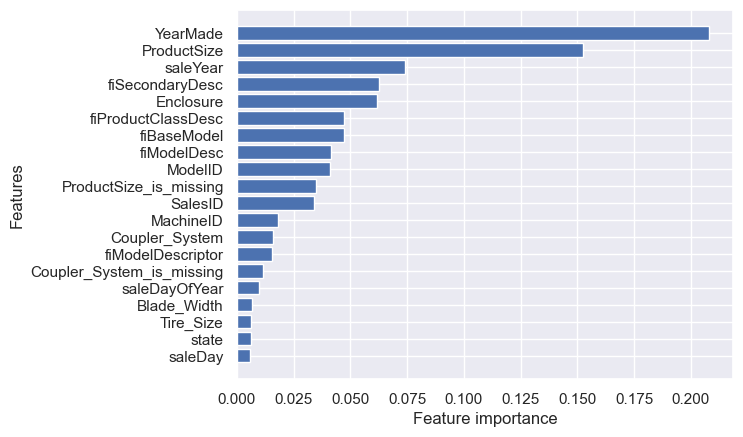

In [123]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [124]:
df["Enclosure"].value_counts()

Enclosure
OROPS                  177971
EROPS                  141769
EROPS w AC              92601
EROPS AC                   18
NO ROPS                     3
None or Unspecified         2
Name: count, dtype: int64

**Pregunta para finalizar:** ¿Por qué podría ser útil conocer la importancia de las características de un modelo de aprendizaje automático entrenado?

**Reto/acción final:** ¿Qué otros modelos de aprendizaje automático podrías probar en nuestro conjunto de datos?  
**Sugerencia:** https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html revisa la sección de regresión de este mapa, o intenta mirar algo como CatBoost.ai o XGBoost.ai.